In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# <span style="color:darkblue"> Question 1  </span>

<font size = "5">

How many bills are there? What proportion of the bills belong to each category? What proportion of the bills belong to
different types of actions within each category?

In [2]:
# load data 

bills_actions = pd.read_csv("data_raw/bills_actions.csv")
bills_actions.dtypes

Congress        int64
bill_number     int64
bill_type      object
action         object
main_action    object
category       object
member_id       int64
dtype: object

In [3]:
Num_bills = len(bills_actions)
print(Num_bills)  #there are 3303 bills in total

# find number of bills by bill category

Num_bills_cate = bills_actions.value_counts(subset=['category'])


#calculate proportion of bills by category

Num_bills_cate/Num_bills




3303


category                    
amendment                       0.462913
house bill                      0.273085
senate bill                     0.155616
house resolution                0.070845
senate resolution               0.018165
house joint resolution          0.006661
house concurrent resolution     0.006055
senate concurrent resolution    0.004239
senate joint resolution         0.002422
Name: count, dtype: float64

In [5]:
# Calculate the counts of each subcategory within each category
counts = bills_actions.groupby(['category', 'main_action']).size().reset_index(name='count')

# Calculate total counts per category
total_counts = counts.groupby('category')['count'].sum().reset_index(name='total_count')

# Merge total counts back to the counts DataFrame
counts = counts.merge(total_counts, on='category')

# Calculate the proportion
counts['proportion'] = counts['count'] / counts['total_count']

# Display the result
for category, group in counts.groupby('category'):
    print(f"Category: {category}")
    for _, row in group.iterrows():
        print(f"  Type of Action: {row['main_action']}, Proportion: {row['proportion']:.2f}")



Category: amendment
  Type of Action: house amendment offered, Proportion: 0.54
  Type of Action: other house amendment actions, Proportion: 0.26
  Type of Action: other senate amendment actions, Proportion: 0.01
  Type of Action: senate amendment proposed (on the floor), Proportion: 0.19
Category: house bill
  Type of Action: house committee/subcommittee actions, Proportion: 0.15
  Type of Action: house floor actions, Proportion: 0.78
  Type of Action: resolving differences -- house actions, Proportion: 0.01
  Type of Action: resolving differences -- senate actions, Proportion: 0.00
  Type of Action: senate committee/subcommittee actions, Proportion: 0.06
  Type of Action: senate floor actions, Proportion: 0.01
Category: house concurrent resolution
  Type of Action: house floor actions, Proportion: 1.00
Category: house joint resolution
  Type of Action: house committee/subcommittee actions, Proportion: 0.18
  Type of Action: house floor actions, Proportion: 0.73
  Type of Action: reso

# <span style="color:darkblue"> Question 2  </span>

<font size = "5">

How many house floor actions are there as part of senate bills (category)? What proportion of these actions were suspended? What proportion of these actions were suspended as amended?

In [22]:
#subset data to get all senate bills (category)
senate_bills = bills_actions.query('category == "senate bill" ')

print(len(senate_bills.query('main_action == "house floor actions"')))

#There are 116 house floor actions as part of senate bills. 



#subset data for all house floor actions as part of senate bills
senate_bills_floor = senate_bills.query('main_action == "house floor actions"')


bool_contains = senate_bills_floor["action"].str.contains("suspend")
print(bool_contains.mean())

#69% of the house floor actions were suspended. 


116
0.6896551724137931


<font size = "5">

The house floor actions mention specific people mentioned by (Mr., Ms., Mrs., etc). Use regular expressions to extract the name of specific people. Produce a new dataset counting how many bills mention the same person and extracting the names of the people mentioned. What is the distribution of total bills proposed per person?

In [50]:
# Regular expression pattern to extract names after Mr., Ms., and Mrs.
name_pattern = r'\b(Mr\.|Ms\.|Mrs\.) ([A-Z][a-z]+ )'

# Use str.findall to extract names
senate_bills_floor['names'] = senate_bills_floor['action'].str.findall(name_pattern)

C:\Users\Zeyuan Wang\AppData\Local\Temp\ipykernel_20700\1806427442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senate_bills_floor['names'] = senate_bills_floor['action'].str.findall(name_pattern)


,Name,Count
0,"(Ms., Lofgren )",1
1,"(Mr., Evans )",1
2,"(Mr., Clay )",2
3,"(Mr., Larsen )",1
4,"(Mrs., Luria )",3
5,"(Ms., Kuster )",1
6,"(Mr., Takano )",9
7,"(Mr., Raskin )",2
8,"(Mr., Sherman )",2
9,"(Mr., Gomez )",1


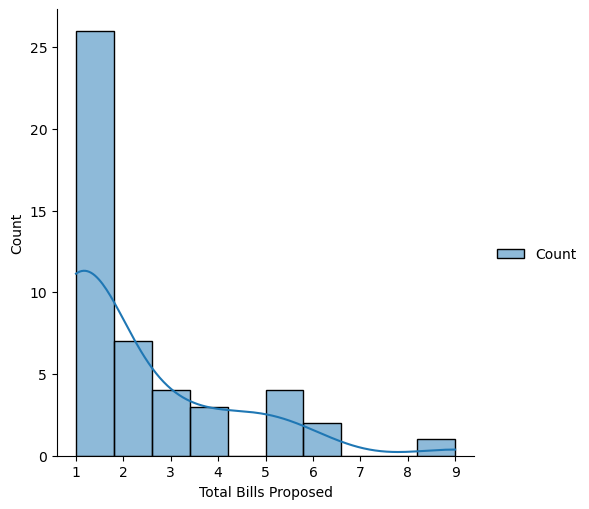

In [51]:
from collections import Counter

# Flatten the list of lists into a single list of names
all_names = [name for sublist in senate_bills_floor['names'] for name in sublist]



# Count occurrences of each name
name_counts = Counter(all_names)

# Create a DataFrame for the frequency of the same person being mentioned
name_counts_df = pd.DataFrame(name_counts.items(), columns=['Name', 'Count'])

display(name_counts_df)


#show the distribution of total bills proposed per person. 

import seaborn as sns

ax =sns.displot(name_counts_df, kde=True, bins=10)
ax.set(xlabel ="Total Bills Proposed")
plt.show()


# <span style="color:darkblue"> Question 3  </span>

<font size = "5">

Now focus a subset of bills whose actions are marked as “senate amendment proposed (on the floor)”. Produce a new dataset counting how many senators are mentioned per bill. This dataset should also include two variables, with the name of the first senator (Senator 1) mentioned in the bill and the name of the second senator (Senator 2). What is the distribution of number of senators per bill?

C:\Users\Zeyuan Wang\AppData\Local\Temp\ipykernel_20700\806935907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senate_amendments['senator_names'] = senate_amendments['action'].str.findall(name_pattern)


,Congress,bill_number,bill_type,action,main_action,category,member_id,senator_names,Senator_1,Senator_2,total_senators
0,116,1029,s,S.Amdt.1274 Amendment SA 1274 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,"[McConnell, Cornyn]",McConnell,Cornyn,2
1,116,1031,s,S.Amdt.2698 Amendment SA 2698 proposed by Sena...,senate amendment proposed (on the floor),amendment,675,[Hawley],Hawley,None,1
2,116,1160,s,S.Amdt.2659 Amendment SA 2659 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,"[McConnell, Smith]",McConnell,Smith,2
8,116,1253,s,S.Amdt.2424 Amendment SA 2424 proposed by Sena...,senate amendment proposed (on the floor),amendment,297,"[Feinstein, Cornyn]",Feinstein,Cornyn,2
11,116,1309,s,S.Amdt.1275 Amendment SA 1275 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,"[McConnell, Cardin]",McConnell,Cardin,2
...,...,...,...,...,...,...,...,...,...,...,...
2947,116,6201,hr,S.Amdt.1558 Amendment SA 1558 proposed by Sena...,senate amendment proposed (on the floor),amendment,1701,[Johnson],Johnson,None,1
2948,116,6201,hr,S.Amdt.1559 Amendment SA 1559 proposed by Sena...,senate amendment proposed (on the floor),amendment,891,[Murray],Murray,None,1
2949,116,6201,hr,S.Amdt.1556 Amendment SA 1556 proposed by Sena...,senate amendment proposed (on the floor),amendment,1666,[Paul],Paul,None,1
3155,116,8337,hr,S.Amdt.2664 Amendment SA 2664 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,[McConnell],McConnell,None,1


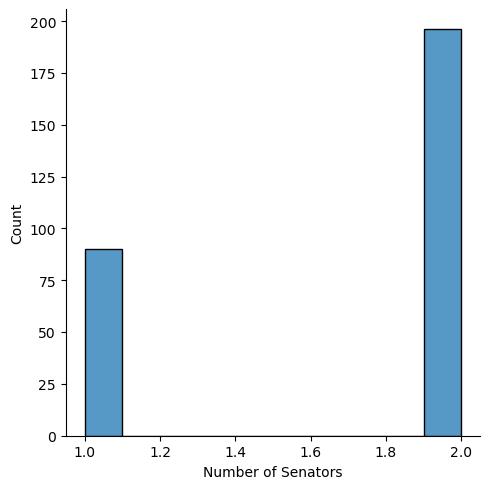

In [66]:
#subset the data by main action type mentioned

senate_amendments = bills_actions.query('main_action == "senate amendment proposed (on the floor)" ')

# Regular expression pattern to extract senator names
name_pattern = r'Senator ([A-Z][a-zA-Z]*(?: Mc[A-Z][a-zA-Z]*)?(?: [A-Z][a-zA-Z]*\.?)?)'


senate_amendments['senator_names'] = senate_amendments['action'].str.findall(name_pattern)

# Normalize the extracted names into separate columns
senator_names_expanded = senate_amendments['senator_names'].apply(lambda x: pd.Series(x + [None] * (2 - len(x))) if len(x) < 2 else pd.Series(x))

# Rename the columns for clarity
senator_names_expanded.columns = ['Senator_1', 'Senator_2']

# Combine the original DataFrame with the new senator names DataFrame
result_df = pd.concat([senate_amendments, senator_names_expanded], axis=1)


#count number of senators for each bill 
result_df['total_senators'] = result_df['senator_names'].apply(len)



display(result_df)


#present distribution of number of senators per bill using barplot

ax2 =sns.displot(x= 'total_senators', data = result_df, kde=False, bins=10)
ax2.set(xlabel = "Number of Senators")
plt.show()


<font size = "5">
With how many different people does each Senator 1 coauthor bills, i.e. how many different people appear as Senator 2 for each Senator 1?

In [69]:
#group by the first senator and find all unique second senators paired with the first senator

senator_2_count = result_df.groupby('Senator_1')['Senator_2'].nunique().reset_index()

senator_2_count.columns = ['Senator_1', 'Unique Senator_2']

#present results in table 

display(senator_2_count)


,Senator_1,Unique Senator_2
0,Braun,5
1,Brown,0
2,Cornyn,9
3,Cramer,7
4,Cruz,0
5,Feinstein,1
6,Fischer,2
7,Grassley,1
8,Hawley,1
9,Inhofe,1
